In [4]:
# (1) data 가져오기
import pandas as pd
data = pd.read_csv("./bike_sharing_demand_data/train.csv")
print(data.shape)
data.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기


data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["hour"] = data["datetime"].dt.hour
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour
data["minute"] = data["datetime"].dt.minute
data["second"] = data["datetime"].dt.second



In [6]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

# sns.countplot 활용해서 시각화하기

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# %config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))

sns.countplot(data["year"], ax=ax[0, 0])
sns.countplot(data["month"], ax=ax[0, 1])
sns.countplot(data["day"], ax=ax[1, 0])
sns.countplot(data["hour"], ax=ax[1, 1])
sns.countplot(data["minute"], ax=ax[2, 0])
sns.countplot(data["second"], ax=ax[2, 1])

<Axes: ylabel='count'>

Error in callback <function flush_figures at 0x000001D5FBDF67A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [11]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
from sklearn.model_selection import train_test_split

data2 = data.drop(
    ["casual", "registered", "datetime", "windspeed", "minute", "second"],
    axis=1,
    inplace=False,
)
data2.head()


data3 = data2[~pd.isnull(data2["count"])]

X = data3.drop(["count"], axis=1)
y = data3["count"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234, shuffle=True
)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(8708, 11)
(2178, 11)
(8708,)


In [8]:
# (5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
# 학습된 모델에 X_test를 입력해서 예측값 출력하기
# 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
# mse 값과 함께 rmse 값도 계산하기

from sklearn.metrics import mean_squared_error, root_mean_squared_error

predictions = model.predict(X_test)
print(predictions)

mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print("mse:", mse)
print("rmse:", rmse)


[119.76276009  85.51018036 234.65316164 ... 231.09504289 238.08206183
 217.09208789]
mse: 19594.530136828038
rmse: 139.98046341124908


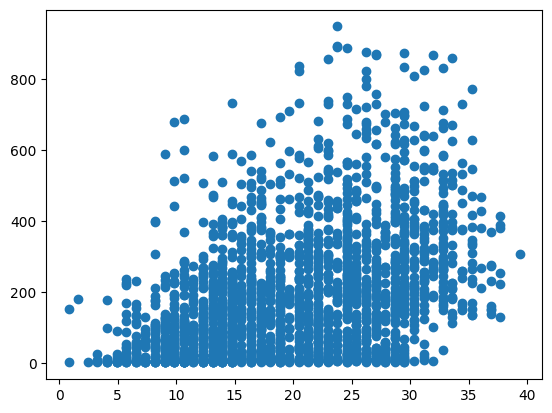

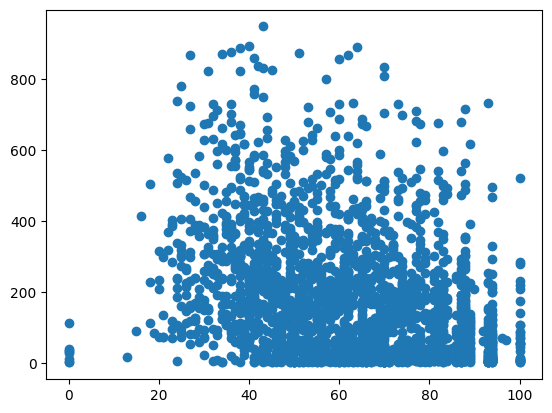

In [15]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

x = X_test["temp"]
y = y_test

plt.scatter(x, y)
plt.show()

x = X_test["humidity"]
y = y_test

plt.scatter(x, y)
plt.show()